In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx", "Data")
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [3]:
df.set_index(df.ID, inplace = True)
df.drop(columns = ["ID"], inplace= True)
df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 546.9 KB


In [5]:
df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# As it makes no sense for experience to be in negative, we observe it's row

In [6]:
df[df["Experience"] < 0]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
90,25,-1,113,94303,4,2.300000,3,0,0,0,0,0,1
227,24,-1,39,94085,2,1.700000,2,0,0,0,0,0,0
316,24,-2,51,90630,3,0.300000,3,0,0,0,0,1,0
452,28,-2,48,94132,2,1.750000,3,89,0,0,0,1,0
525,24,-1,75,93014,4,0.200000,1,0,0,0,0,1,0
537,25,-1,43,92173,3,2.400000,2,176,0,0,0,1,0
541,25,-1,109,94010,4,2.300000,3,314,0,0,0,1,0
577,25,-1,48,92870,3,0.300000,3,0,0,0,0,0,1
584,24,-1,38,95045,2,1.700000,2,0,0,0,0,1,0


In [7]:
df[df["Experience"] >= 0].Experience.corr(df[df["Experience"] >= 0]["Age"])

0.9941014889873745

# Hence as age increases, experience increases too. Hence we make a linear regression model that predicts the experience of all negative values

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
y_reg = df[df["Experience"] >= 0]["Experience"]
X_reg = df[df["Experience"] >= 0][["Age"]]
X_test = df[df["Experience"] < 0][["Age"]]
lin_reg = LinearRegression()
lin_reg.fit(X_reg, y_reg)
lin_reg.score(X_reg, y_reg)

0.9882377704069136

In [10]:
df.loc[df["Experience"] < 0, "Experience"] = lin_reg.predict(X_test)

In [11]:
df[df["Experience"] < 0]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
90,25,-0.089078,113,94303,4,2.300000,3,0,0,0,0,0,1
227,24,-1.082410,39,94085,2,1.700000,2,0,0,0,0,0,0
316,24,-1.082410,51,90630,3,0.300000,3,0,0,0,0,1,0
525,24,-1.082410,75,93014,4,0.200000,1,0,0,0,0,1,0
537,25,-0.089078,43,92173,3,2.400000,2,176,0,0,0,1,0
541,25,-0.089078,109,94010,4,2.300000,3,314,0,0,0,1,0
577,25,-0.089078,48,92870,3,0.300000,3,0,0,0,0,0,1
584,24,-1.082410,38,95045,2,1.700000,2,0,0,0,0,1,0
598,24,-1.082410,125,92835,2,7.200000,1,0,0,1,0,0,1


# Well since even the model gives negative values for experience,  lets just change all those values to 0 

In [12]:
df.loc[df["Experience"] < 0, "Experience"] = 0

# Checking NULL Values

In [13]:
df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# Checking for any less density extreme outliers

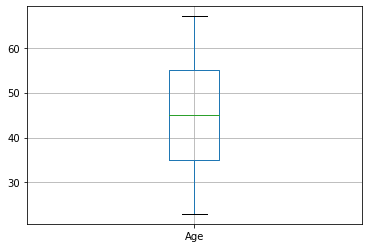

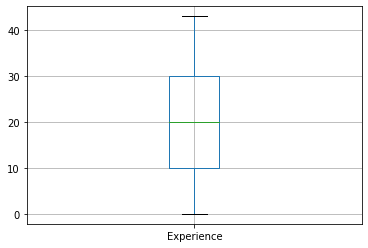

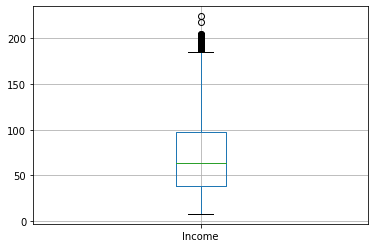

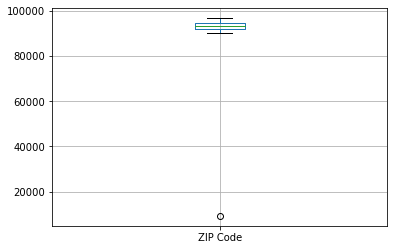

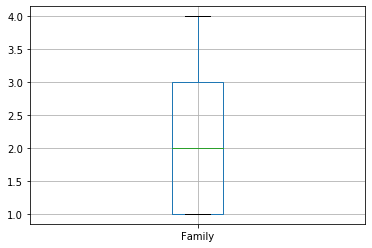

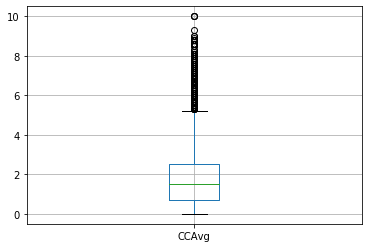

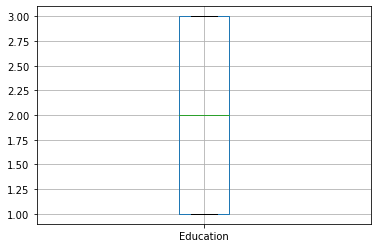

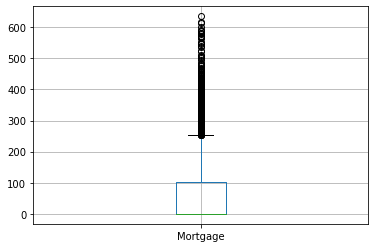

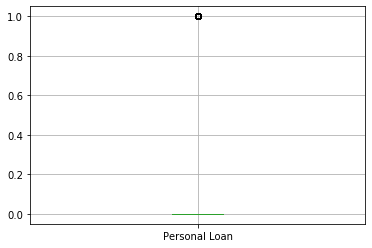

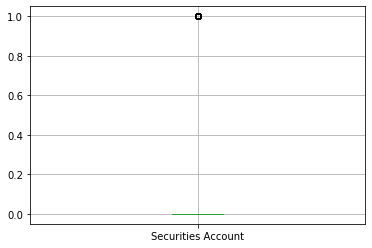

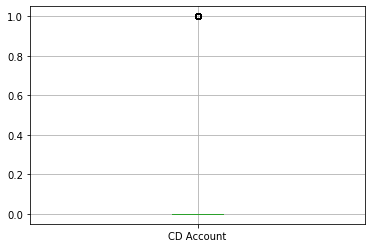

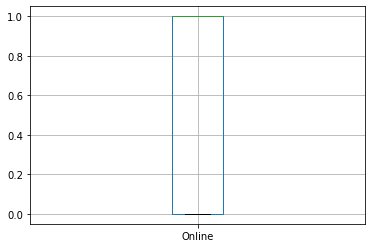

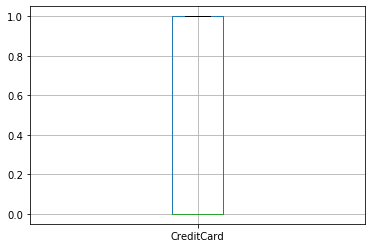

In [14]:
for column in df.columns:
    df.boxplot([column])
    plt.show()

# Though Zip code has an extreme low density outlier, it isn't an unusual value, hence we keep it

# Splitting independent and dependent variables

In [22]:
y = df[['Personal Loan']]
X = df[list(set(df.columns) - set(y.columns))]
y = df['Personal Loan']

# Now checking which feature significantly affects the dependent variable by using random forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rf = RandomForestClassifier(n_estimators=1000, max_features=2, oob_score=True)
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
print("Accuracy:", rf.oob_score_)

Accuracy: 0.9868


In [28]:
for feature, imp in zip(X.columns, rf.feature_importances_):
    print(feature, imp*100, '%')

Online 0.7933733144167556 %
Family 9.199844526515678 %
Age 4.137823490122916 %
CreditCard 0.9127047973679902 %
CCAvg 17.29615085038394 %
Mortgage 4.219162334543916 %
Education 15.635212741242812 %
CD Account 5.272125039561954 %
Experience 4.043854351654205 %
Securities Account 0.5345400221280503 %
Income 33.539895952731875 %
ZIP Code 4.415312579329902 %


# From the above we can see that the person's Income, CCAvg, Family and Education are important features out of all 

In [76]:
features = ["Income", "CCAvg", "Education", "Family", "CD Account", "ZIP Code"]
X = df[features]

# Now we will make a decision tree model

In [89]:
model = DecisionTreeClassifier(max_depth =12, max_leaf_nodes=20)
model.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [91]:
with open("Dtree.dot", 'w') as f:
    f = tree.export_graphviz(model,feature_names = features, out_file=f);

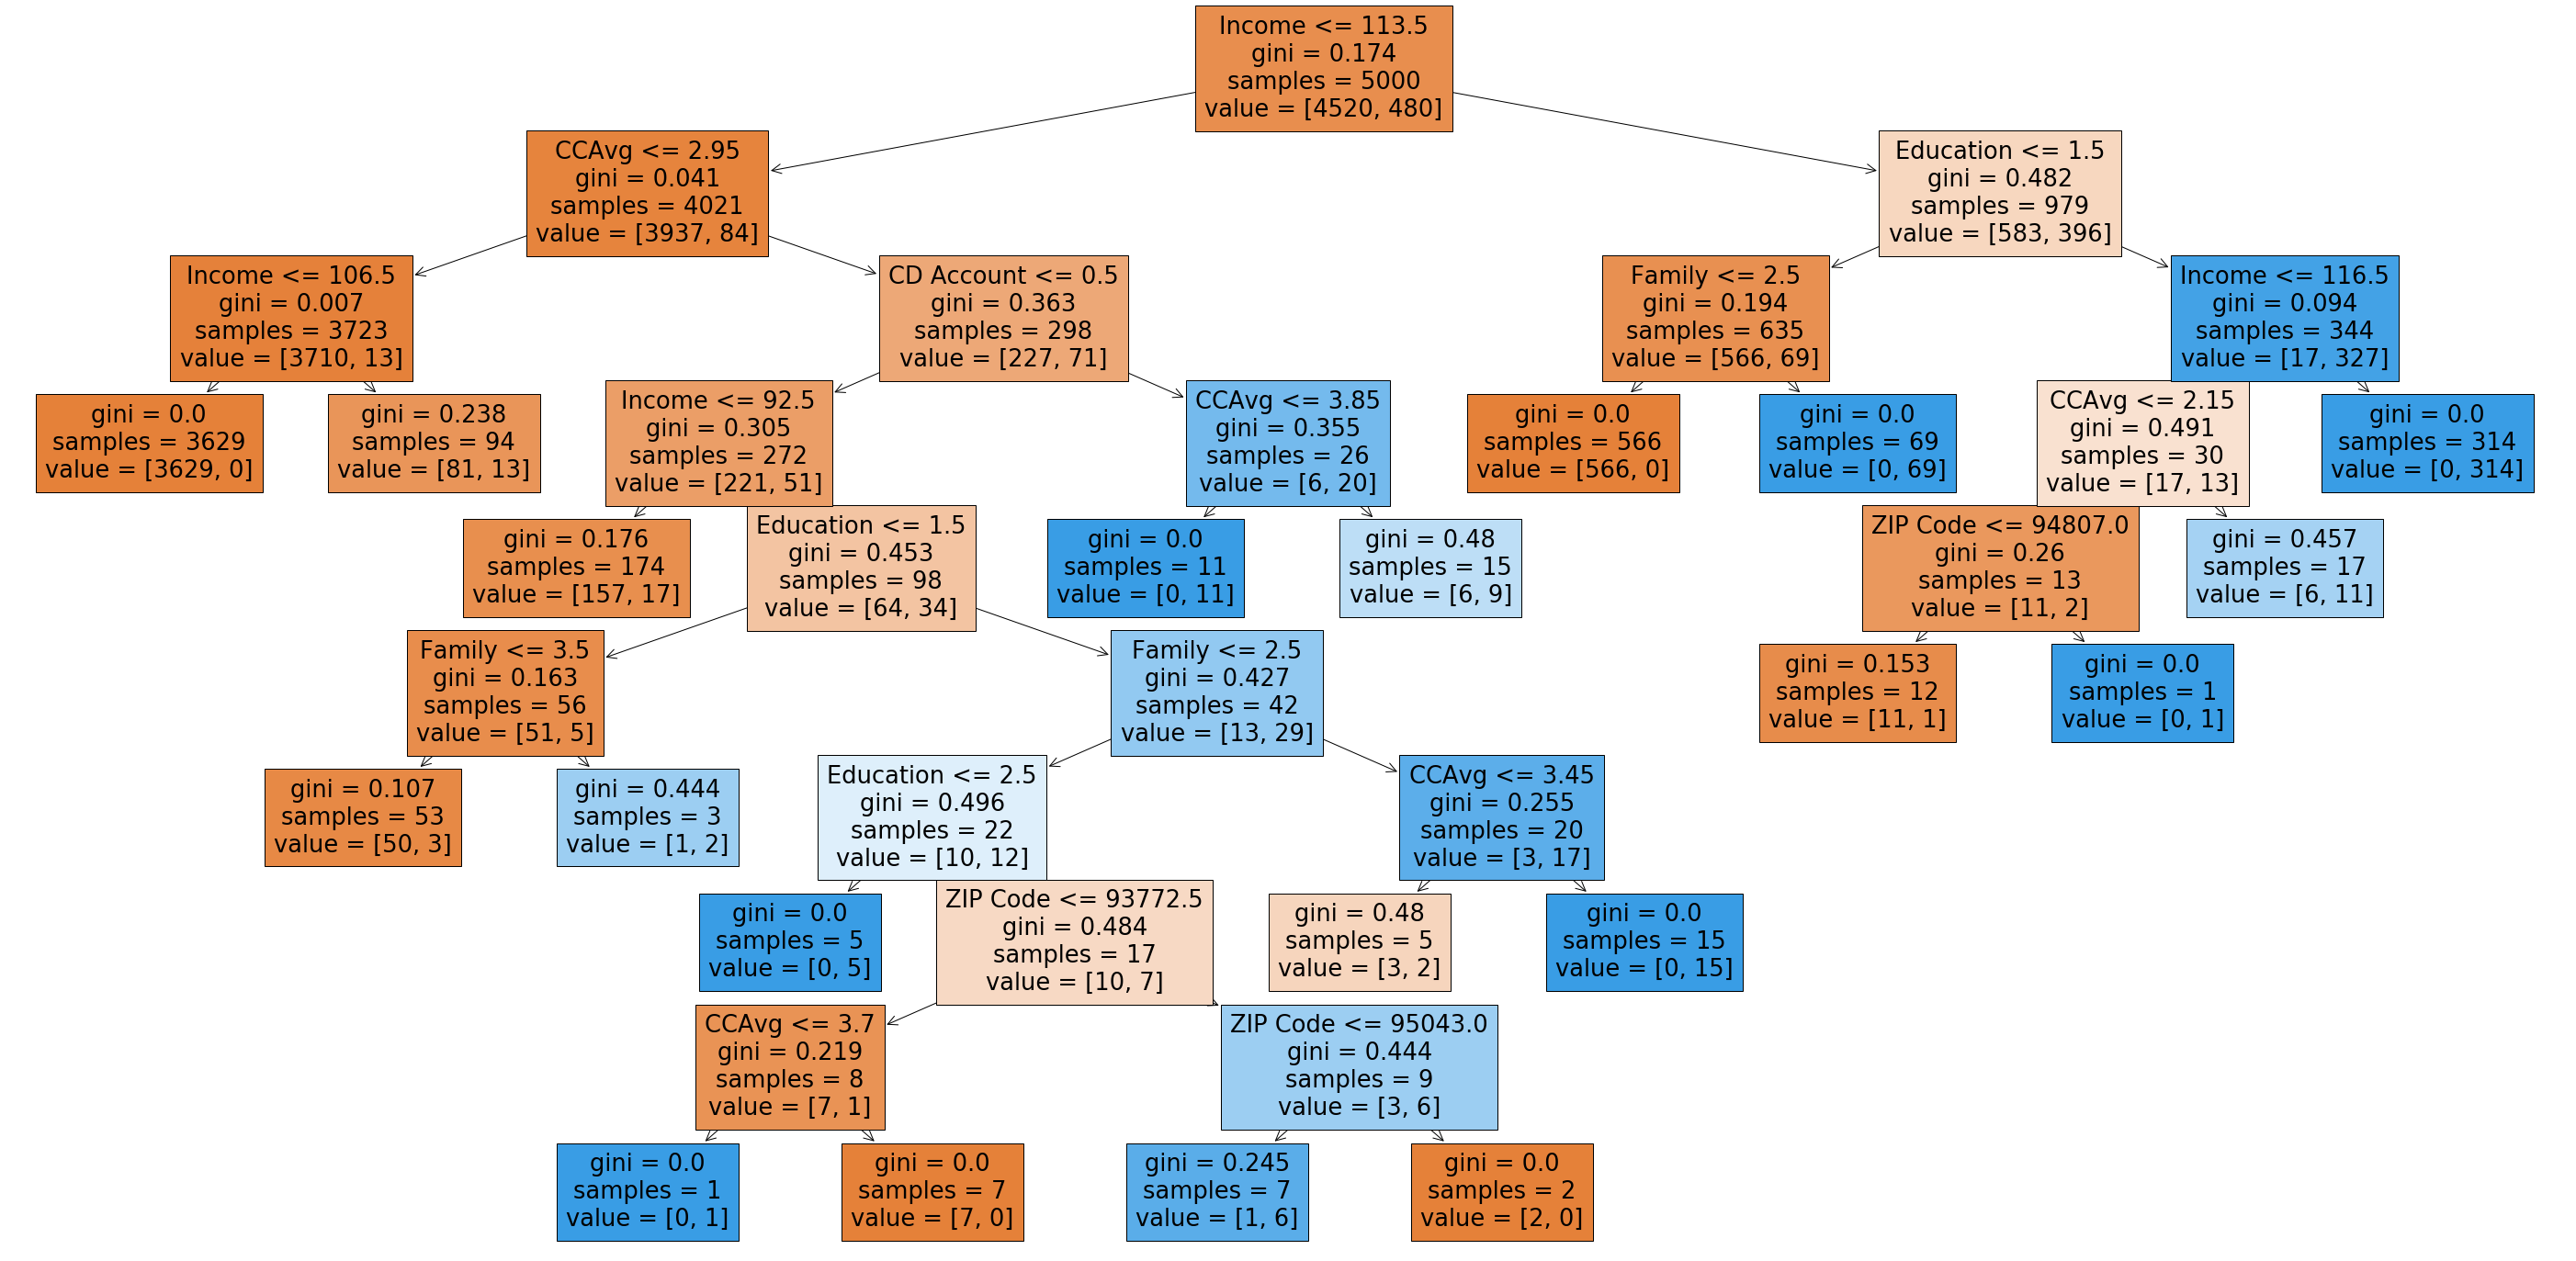

In [92]:
fig = plt.figure(figsize = (50, 25))
_=tree.plot_tree(model, feature_names = features, filled=True)

In [90]:
print("Accuracy:", model.score(X, y))

Accuracy: 0.99


# The decision tree model makes the following rules:    

<h2>Accepts loan</h2>
<ul>
    <li>A person who's income is lower than or equal to 113.5, CCAvg is between 2.95 to 3.85 and CD Account greater than 0.5 accepts loan</li>
    <li>A person who's education from 1.5 to 2.5, family is less than or equal to 2.5, income is from 92.5 to 113.5, CD Account greater than 0.5 and CCAvg is greater than 2.95</li>
    <li>A person who's income is from 92.5 to 113.5, CCAvg is greater than 3.45, CD account is lower than or equal to 0.5, eduaction and family is greater than 1.5 and 2.5 repectively</li>
    <li>A person who's education is greater than 2.5, ZIP code is lower than or equal to 93772.5, family is less than or equal to 2.5, income is from 92.5 to 113.5, CD Account greater than 0.5 and CCAvg is from 2.95 to 3.7</li>
    <li>A person who's income is from 92.5 to 113.5, CCAvg is greater than 3.45, CD account is lower than or equal to 0.5, eduaction and family is greater than 1.5 and 2.5 repectively</li>
    <li>A person who's income is greater than 113.5, education lower than or equal to 1.5, family greater than 2.5</li>
    <li>A person who's income is greater than 116.5, education greater than 1.5</li>
    <li>A person who's income is from 113.5 to 116.5, education greater than 1.5, CCAvg lower tha equal to 2.15, Zip code greater than 94807</li>
</ul>
<h2>Rejects loan</h2>
<ul>
    <li>A person who's income and CCAvg is lower than or equal to 106.5 and 2.95 respectively does not accept personal loan</li>
    <li>A person who's education is greater than 2.5, ZIP code is lower than or equal to 93772.5, family is less than or equal to 2.5, income is from 92.5 to 113.5, CD Account greater than 0.5 and CCAvg is greater than 3.7</li>
    <li>A person who's education is greater than 2.5, ZIP code is lower than or equal to 95043, family is less than or equal to 2.5, income is from 92.5 to 113.5, CD Account greater than 0.5 and CCAvg is greater than 2.95</li>
    <li>A person who's income is greater than 113.5, education lower than or equal to 1.5, family lower than or equal to 2.5</li>
</ul>